# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#+ _  =  -

In [1]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install --upgrade pandas

In [3]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'

In [5]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
#reading data
df=pd.read_excel(data,header=1)

# **Data inspection**

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Surprisingly,We didn't have any of the missing and null values in the dataset.So,there is no needed for the null value treatment in the dataset

In [10]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [11]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [12]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [13]:
#viewing Data
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0



# **Data cleaning**

In [14]:
df['LIMIT_BAL'].max()

1000000

In [15]:
df['LIMIT_BAL'].min()

10000

In [16]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [17]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0



Looking for Outlier Using Isolation Forest

In [19]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [20]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [21]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [22]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.190476,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.212437,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.171549,1


In [23]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-0.051680,-1
59,400000,2,2,1,29,0,0,0,0,0,0,400134,398857,404205,360199,356656,364089,17000,15029,30000,12000,12000,23000,0,-0.015094,-1
102,480000,1,1,1,63,0,0,0,2,2,0,422069,431342,479432,487066,471145,469961,16078,55693,17000,0,18000,24200,0,-0.078952,-1
214,470000,1,2,2,27,2,2,2,2,0,0,296573,303320,307843,479978,305145,309959,13000,11001,0,10484,10838,10367,0,-0.024130,-1
360,500000,2,2,2,23,4,3,2,0,0,0,507726,509229,499936,505507,484612,419643,10000,0,14000,16500,16000,19000,1,-0.073918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,0,474934,507062,491956,430637,376657,356636,40024,325,15296,12137,12312,14113,0,-0.047464,-1
29820,400000,1,2,2,37,1,-1,0,0,0,0,396343,394858,395716,385947,305542,271385,423903,15100,14600,13000,9500,9500,0,-0.057618,-1
29837,500000,1,1,2,34,0,0,0,0,0,0,494356,488578,488166,485249,441981,424592,17438,18852,16673,15244,15216,16037,0,-0.032132,-1
29883,420000,1,1,1,34,0,0,0,0,0,0,454391,466810,483277,479800,489200,489200,20000,24000,11000,10000,0,11000,0,-0.028768,-1


In [24]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [25]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# **Exploratory Data Analysis and feature Engineering**

In [26]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23154
1     6546
Name: Defaulters, dtype: int64

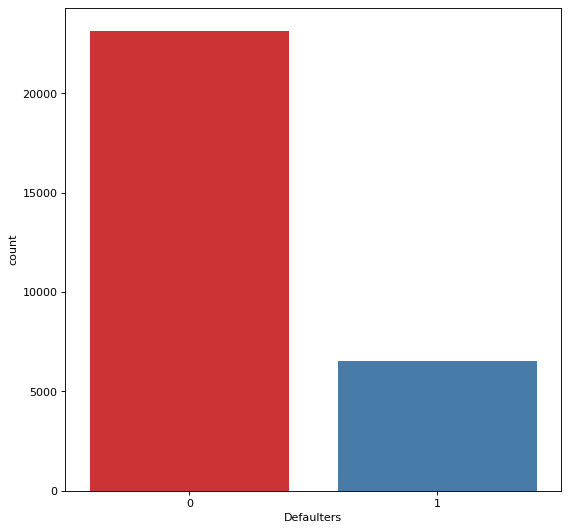

In [27]:
#visualizing dependent variable
plt.figure(figsize=(8,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**


# **Bivariate Analysis**

In [28]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

#creating different df for categorical variable
df_cat = df[categorical_features]

#checking shape of categorical variable
df_cat.shape



(29700, 3)

In [29]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [30]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17963
1    11737
Name: SEX, dtype: int64

count of EDUCATION features

2    13922
1    10437
3     4885
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15838
1    13486
3      322
0       54
Name: MARRIAGE, dtype: int64



In [31]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

df_cat.head()



,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


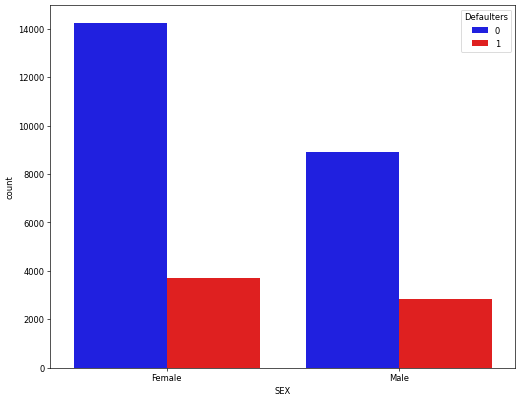

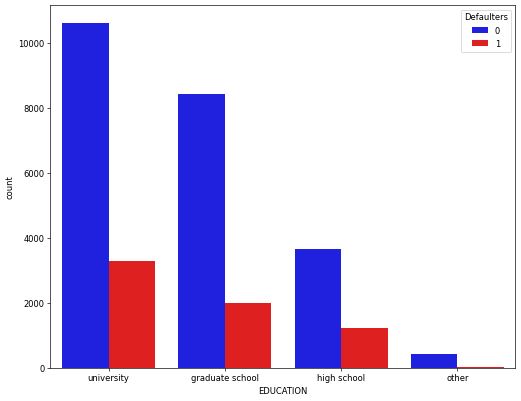

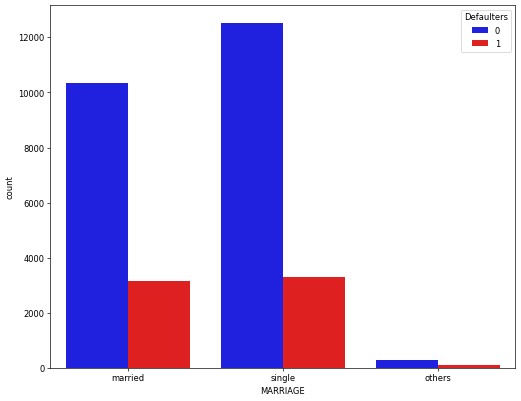

In [32]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["blue",'red'])
  plt.show()

In [33]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17963
Male      11737
Name: SEX, dtype: int64

count of EDUCATION features

university         13922
graduate school    10437
high school         4885
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15838
married    13486
others       376
Name: MARRIAGE, dtype: int64



In [34]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [35]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.206981
1    Male   0.240947
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251382
2            other   0.070175
3       university   0.235957
  MARRIAGE  Defaulter
0  married   0.233872
1   others   0.236702
2   single   0.208549


**Observation**

for Sex feature:

    we can see that number of females are more than the males
    but the default ratio of male is quite higher than female

for Education feature:

    university and High School pesons are more likely to be defaulter in comparison with the graduate school persons.

for Marriage feature:

    people who are not married nor single are more likely to make default of bills in comparison with single and married person


In [36]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435455
std          9.198810
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64


observation

    we can see here min age is 21 and maximum age is 79 in our dataset



In [37]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

df.head()



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [38]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10962
31-40         10606
41-50          5908
51-60          1966
60 & above      258
Name: age_group, dtype: int64

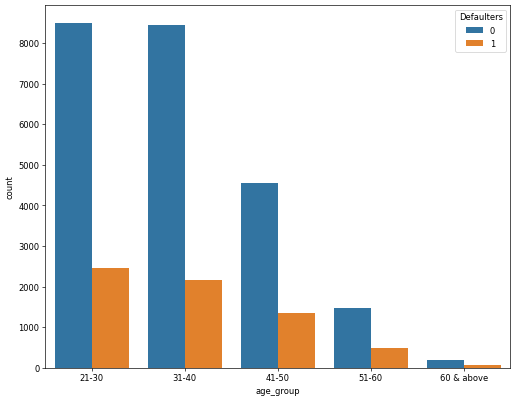

In [39]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')


obsevation:

    In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.



In [40]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224229
1,31-40,0.203564
2,41-50,0.230366
3,51-60,0.252798
4,60 & above,0.275194



observation

    we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.



In [41]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [42]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023266,-0.140572,-0.172492,-0.226296,-0.271549,-0.296498
std,1.113858,1.189198,1.192044,1.166326,1.131761,1.148976
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [43]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5358.378047,5.406675e+03,4904.933434,4599.478047,4561.223973,4826.430943
std,14280.856685,1.613122e+04,14758.116252,14559.000559,14159.246540,15665.870251
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.157500e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [44]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48179.994916,46164.947912,43873.935421,40258.277104,37494.355690,36265.737104
std,65642.197006,62954.356763,60427.570373,55956.697295,52716.217836,52097.663795
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3457.750000,2895.500000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21706.000000,20650.000000,19779.500000,18783.000000,17860.000000,16703.500000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48278.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


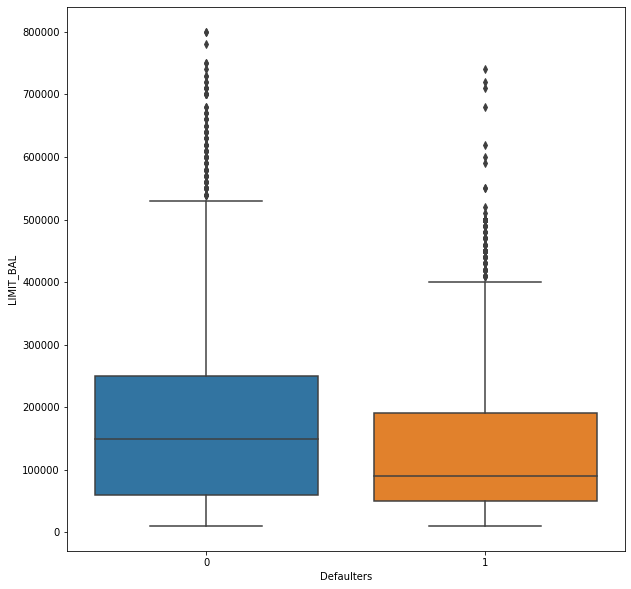

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

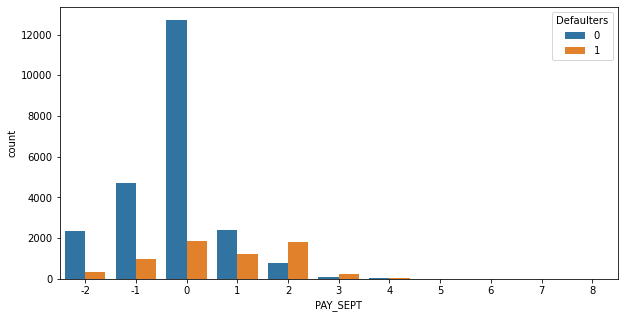

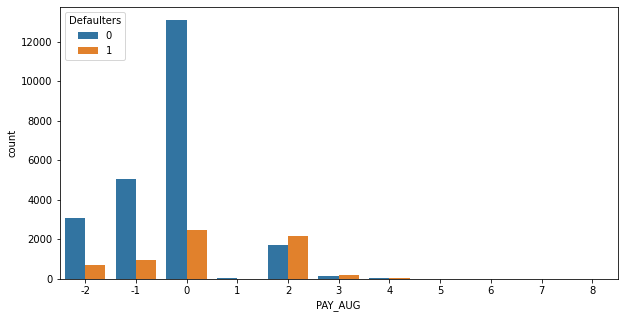

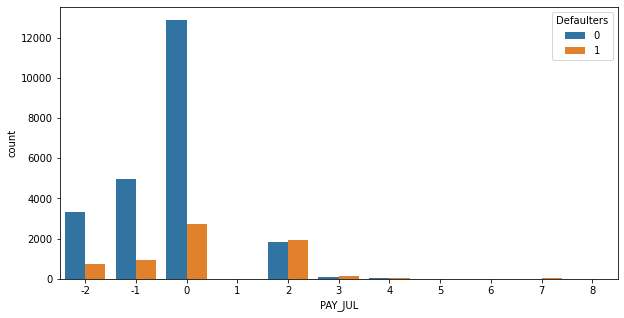

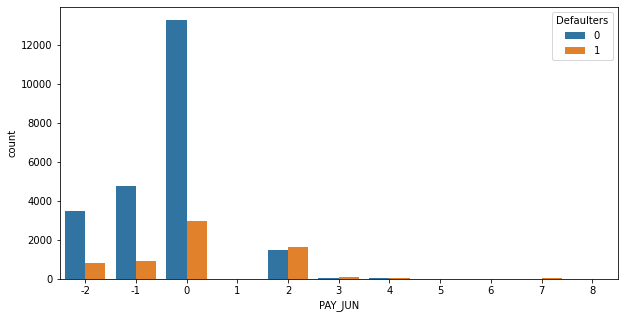

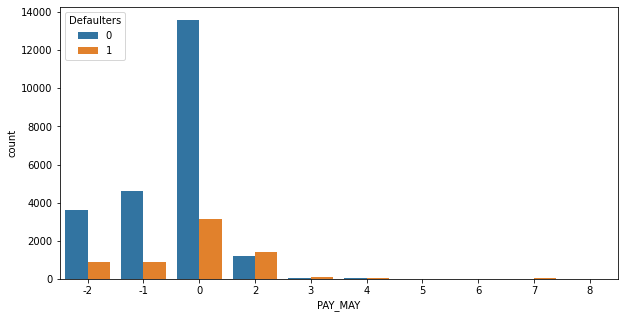

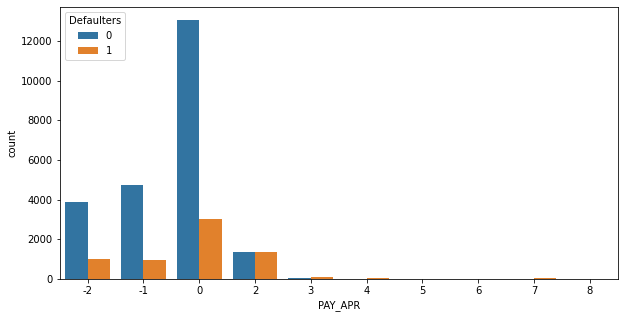

In [46]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

In [47]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297


**Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column**

In [48]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

#looking into independent variable
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [49]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [50]:
# one hot encoding for age group
X=pd.get_dummies(X)

X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [51]:
#spliting Dependent variable
y=df['Defaulters']

df_final=X.copy()

df_final.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [52]:
df_final['Defaulters']=df['Defaulters']

df_final

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above,Defaulters
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
29997,30000,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
29998,80000,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1


In [53]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46308


In [54]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23154],
       [    1, 23154]])

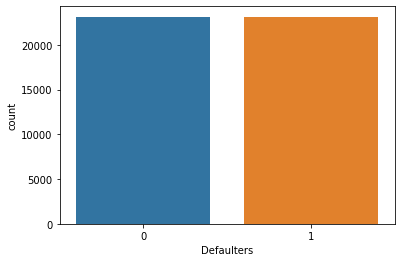

In [55]:
sns.countplot(y_smote)

# **Train | Test Split**

In [57]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

#looking into independent variable of train dataset
X_train

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
33806,120000,0,-1,-1,-1,-1,-1,354,349,344,127,863,515,356,356,148,883,517,866,0,1,1,0,0,0,0,0,0,0,0,0,0,0
29971,360000,2,2,-2,-2,-2,-2,2500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
453,180000,0,0,0,0,0,0,152510,151651,159019,123022,126075,126219,5657,10372,5000,5000,5000,5000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
21399,100000,1,2,0,0,0,2,7127,6867,8095,9296,10241,9936,0,1500,1500,1100,0,3000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
1652,290000,-1,-1,-1,-1,-1,0,1520,1200,0,1000,28661,8976,1200,0,1000,9948,8974,175000,0,1,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30000,0,0,0,0,0,0,23819,15367,10159,9859,8360,4101,1553,1033,381,384,404,1297,1,0,0,0,0,1,1,0,0,0,1,0,0,0
8006,200000,-1,-1,0,0,0,0,1674,7398,6867,7477,7232,6442,7398,1000,1000,145,276,780,1,0,1,0,0,0,0,0,1,1,0,0,0,0
17745,10000,3,2,2,3,3,3,1050,1050,1050,1050,1050,1050,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
17931,100000,0,0,0,0,0,0,81210,78785,69138,69604,69448,69744,3019,2600,3100,3000,3000,3000,0,1,1,0,0,0,0,0,1,0,1,0,0,0


In [58]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)


# **Creating Function**

In [59]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]

In [60]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))

In [61]:
pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=563bd209311521cf3bf6cd351d7723e320bd1b5d37cf093f8d8de7c4ad6f18db
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [63]:
#  importing lime 
import lime
import lime.lime_tabular

# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


# **creating function to get feature importance**

In [64]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);


# **Logistic Regression**

In [65]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

#creating Instance of Logistic Regression

log_model= LogisticRegression()

#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)



Training time: 0.0304min 

score matrix for train
********************************************************************************
The accuracy is  0.866401773631626
The precision is  0.954291445765869
The recall is  0.7689643228264634
The f1 is  0.8516624040920716
the auc  is  0.8661583059361795

confusion_matrix 
  [[16771   638]
 [ 4002 13320]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8650773084564222
The precision is  0.9542553191489361
The recall is  0.7690329218106996
The f1 is  0.8516900873528295
the auc  is  0.8658045374936874

confusion_matrix 
  [[55

**implementing GridSearch for Hyperparameter Tuning**

In [66]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.2272min 

score matrix for train
********************************************************************************
The accuracy is  0.8598082404768075
The precision is  0.9344170794669644
The recall is  0.7731786167878998
The f1 is  0.8461854367398516
the auc  is  0.8595917783807383

confusion_matrix 
  [[16469   940]
 [ 3929 13393]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     17409
           1       0.93      0.77      0.85     17322

    accuracy                           0.86     34731
   macro avg       0.87      0.86      0.86     34731
weighted avg       0.87      0.86      0.86     34731



score matrix for test
********************************************************************************
The accuracy is  0.8615358037488123
The precision is  0.9376940592009936
The recall is  0.7767489711934157
The f1 is  0.84966707305